<a href="https://colab.research.google.com/github/rororoy/Assembler-Project/blob/main/MMN11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MMN 11 - ROY LAVROV - 322492059**
## **Handwritten Digit Classification**
### As stated in the guidelines the task is to train  our model on datasets of handwritten digits (0-9) to guess for an image the apropriate digit it represents.


---


### **Setting up and preperations:**

"The MNIST dataset serves as a cornerstone in the domain of digit classification. It
comprises a collection of 28x28 pixel grayscale images, each depicting a handwritten
digit (0 through 9). "

In [10]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

The training MNIST dataset split into two subsets of images:
**60,000** - for training
**10,000** - for testing

In [13]:
# Fetch MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

samples = X.shape[0]
features = X.shape[1]

# Convert X into a matrix with bias (=1)
X = X.to_numpy()
X_with_bias = np.c_[X, np.ones(X.shape[0])]

# Convert string labels to integers
y = y.astype(int)

# Convert y into a matrix
y = y.to_numpy()

# Convert y into a matrix of one hot vectors
y_onehot = np.zeros((samples, 10), dtype=int)
y_onehot[np.arange(samples), y] = 1

# Split into training and testing sets (60,000 for training, 10,000 for testing)
X_train, X_test, y_train_onehot, y_test_onehot = train_test_split(
    X_with_bias, y_onehot, train_size=60000, test_size=10000, random_state=42)

# Crearing a signed y set with values [-1,1]
y_signed_train = np.where(y_train_onehot == 1, 1, -1)
y_signed_test = np.where(y_test_onehot == 1, 1, -1)

# **Part A: Perceptron**
### **We define the single Perceptron class that will be trained individually to correctly predict a given target digit as one vs all.**
* We track the history of the best performing weights (starting with W = 0) to track the one with the best accurecy one as per the pocket algorithem
* The model determines the better weight to use based on what the error rate is by calculating the proportion of examples that were misclassified

In [4]:
class Perceptron:
  def __init__(self, n_features=785, target_digit=None, max_iterations=1000, learning_rate=1.0):
    self.n_features = n_features
    self.target_digit = target_digit
    self.max_iterations = max_iterations
    self.learning_rate = learning_rate
    self.W = None
    self.pocket_history = []

  def fit(self, X, y_signed):
    # Extract relevant column for this perceptron's target digit
    y = y_signed[:, self.target_digit]

    # Initialize weights
    self.W = np.zeros(self.n_features)
    best_W = self.W.copy()
    best_error = float('inf')

    for iteration in tqdm(range(self.max_iterations), desc= f'train with pocket algo'):
      # Get current predictions
      y_pred = self.predict(X)

      # Find misclassified examples
      misclassified_indices = np.where(y_pred != y)[0]

      # If no misclassified examples, we're done
      if len(misclassified_indices) == 0:
        print(f"Perceptron for digit {self.target_digit} converged after {iteration+1} iterations!")
        break

      # Randomly choose a misclassified example
      idx = np.random.choice(misclassified_indices)

      # Update weights
      self.W = self.W + self.learning_rate * y[idx] * X[idx]

      # Calculate current error
      current_error = np.mean(self.predict(X) != y)

      # Update pocket weights if improved
      if current_error < best_error:
        best_W = self.W.copy()
        best_error = current_error

        # Record pocket weights and error
        self.pocket_history.append((iteration + 1, best_W.copy(), best_error))

    # Use the best weights found
    self.W = best_W
    return self


  def predict(self, X):
    return np.sign(X @ self.W)

  def confidence_scores(self, X):
    return X @ self.W

  def calculate_accuracy(self, X, y):
    y_pred = self.predict(X)
    return np.mean(y_pred == y)

  def Ein(self, X, y):
    y_pred = self.predict(X)
    return np.mean(y_pred != y)

### **Now to strengthen the case of the weakness of the later multi class percepton we'll train the perceptron individually for each class and analyze the performance digit by digit**
The results of the individual tests and analysis of the average accurecy and sensetivity will point out the efficiency of the models' predictions when we use the perceptron on each digit individually: one digit vs all


=== Training perceptron for digit 0 ===


train with pocket algo:   0%|          | 0/700 [00:00<?, ?it/s]

Accuracy: 0.9877
Sensitivity (TPR): 0.9247

=== Training perceptron for digit 1 ===


train with pocket algo:   0%|          | 0/700 [00:00<?, ?it/s]

Accuracy: 0.9909
Sensitivity (TPR): 0.9497

=== Training perceptron for digit 2 ===


train with pocket algo:   0%|          | 0/700 [00:00<?, ?it/s]

Accuracy: 0.9746
Sensitivity (TPR): 0.8718

=== Training perceptron for digit 3 ===


train with pocket algo:   0%|          | 0/700 [00:00<?, ?it/s]

Accuracy: 0.9685
Sensitivity (TPR): 0.8482

=== Training perceptron for digit 4 ===


train with pocket algo:   0%|          | 0/700 [00:00<?, ?it/s]

Accuracy: 0.9792
Sensitivity (TPR): 0.8852

=== Training perceptron for digit 5 ===


train with pocket algo:   0%|          | 0/700 [00:00<?, ?it/s]

Accuracy: 0.9630
Sensitivity (TPR): 0.6766

=== Training perceptron for digit 6 ===


train with pocket algo:   0%|          | 0/700 [00:00<?, ?it/s]

Accuracy: 0.9855
Sensitivity (TPR): 0.9011

=== Training perceptron for digit 7 ===


train with pocket algo:   0%|          | 0/700 [00:00<?, ?it/s]

Accuracy: 0.9811
Sensitivity (TPR): 0.8758

=== Training perceptron for digit 8 ===


train with pocket algo:   0%|          | 0/700 [00:00<?, ?it/s]

Accuracy: 0.9344
Sensitivity (TPR): 0.5253

=== Training perceptron for digit 9 ===


train with pocket algo:   0%|          | 0/700 [00:00<?, ?it/s]

Accuracy: 0.9538
Sensitivity (TPR): 0.7741


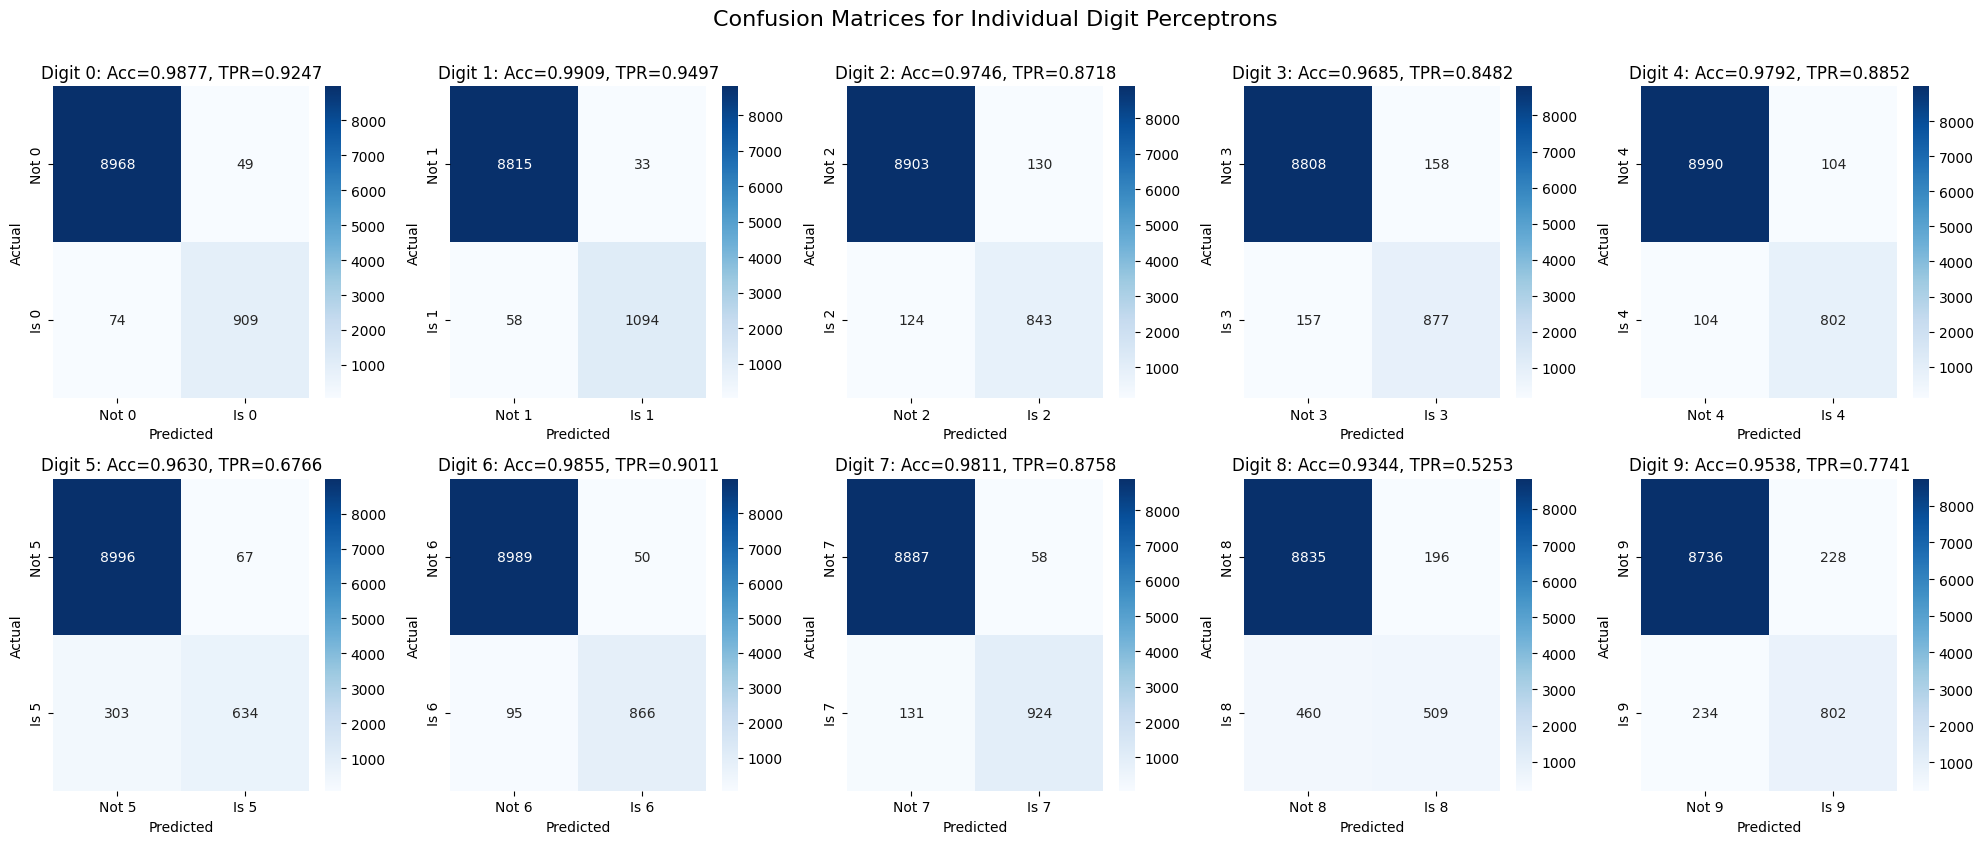

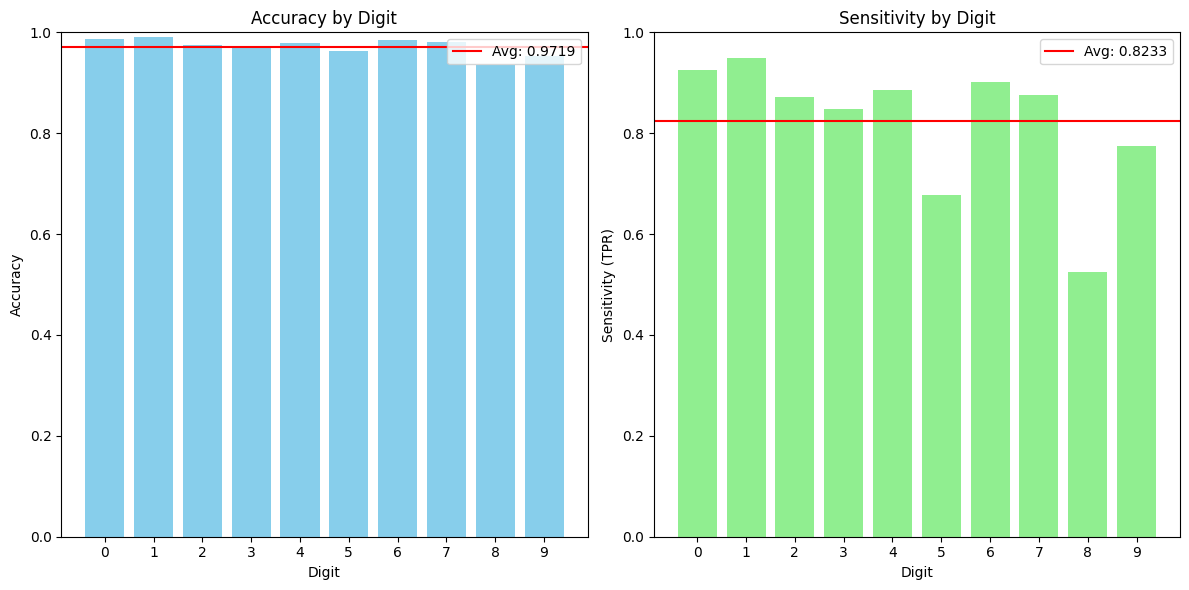


=== Summary ===
Digit  |  Accuracy  |  Sensitivity
-----------------------------------
  0    |   0.9877   |   0.9247
  1    |   0.9909   |   0.9497
  2    |   0.9746   |   0.8718
  3    |   0.9685   |   0.8482
  4    |   0.9792   |   0.8852
  5    |   0.9630   |   0.6766
  6    |   0.9855   |   0.9011
  7    |   0.9811   |   0.8758
  8    |   0.9344   |   0.5253
  9    |   0.9538   |   0.7741

Average accuracy: 0.9719
Average sensitivity: 0.8233


In [19]:
def train_and_evaluate_all_digits(X_train, y_signed_train, X_test, y_signed_test):
    # Store results
    accuracies = []
    sensitivities = []
    all_conf_matrices = []

    # Create a figure for the confusion matrices
    fig, axes = plt.subplots(2, 5, figsize=(20, 8))
    axes = axes.flatten()

    # Train and evaluate a perceptron for each digit
    for digit in range(10):
        print(f"\n=== Training perceptron for digit {digit} ===")

        # Create and train perceptron
        perceptron = Perceptron(n_features=X_train.shape[1], target_digit=digit, max_iterations=700)
        perceptron.fit(X_train, y_signed_train)

        # Get predictions
        y_pred = perceptron.predict(X_test)
        y_true = y_signed_test[:, digit]

        # Calculate accuracy
        accuracy = np.mean(y_pred == y_true)
        accuracies.append(accuracy)

        # Create confusion matrix
        true_pos = np.sum((y_pred == 1) & (y_true == 1))
        true_neg = np.sum((y_pred == -1) & (y_true == -1))
        false_pos = np.sum((y_pred == 1) & (y_true == -1))
        false_neg = np.sum((y_pred == -1) & (y_true == 1))

        conf_matrix = np.array([
            [true_neg, false_pos],
            [false_neg, true_pos]
        ])
        all_conf_matrices.append(conf_matrix)

        # Calculate sensitivity (true positive rate)
        sensitivity = true_pos / (true_pos + false_neg) if (true_pos + false_neg) > 0 else 0
        sensitivities.append(sensitivity)

        # Only print summary results, not the raw confusion matrix
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Sensitivity (TPR): {sensitivity:.4f}")

        # Plot the confusion matrix as a heatmap
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[digit],
                   xticklabels=['Not '+str(digit), 'Is '+str(digit)],
                   yticklabels=['Not '+str(digit), 'Is '+str(digit)])
        axes[digit].set_title(f'Digit {digit}: Acc={accuracy:.4f}, TPR={sensitivity:.4f}')
        axes[digit].set_xlabel('Predicted')
        axes[digit].set_ylabel('Actual')

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.suptitle('Confusion Matrices for Individual Digit Perceptrons', fontsize=16, y=1.05)
    plt.show()

    # Plot accuracy and sensitivity as bar charts
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.bar(range(10), accuracies, color='skyblue')
    plt.axhline(y=np.mean(accuracies), color='r', linestyle='-', label=f'Avg: {np.mean(accuracies):.4f}')
    plt.ylim(0, 1)
    plt.xlabel('Digit')
    plt.ylabel('Accuracy')
    plt.title('Accuracy by Digit')
    plt.xticks(range(10))
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.bar(range(10), sensitivities, color='lightgreen')
    plt.axhline(y=np.mean(sensitivities), color='r', linestyle='-', label=f'Avg: {np.mean(sensitivities):.4f}')
    plt.ylim(0, 1)
    plt.xlabel('Digit')
    plt.ylabel('Sensitivity (TPR)')
    plt.title('Sensitivity by Digit')
    plt.xticks(range(10))
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Print summary table
    print("\n=== Summary ===")
    print("Digit  |  Accuracy  |  Sensitivity")
    print("-----------------------------------")
    for i in range(10):
        print(f"  {i}    |   {accuracies[i]:.4f}   |   {sensitivities[i]:.4f}")

    print(f"\nAverage accuracy: {np.mean(accuracies):.4f}")
    print(f"Average sensitivity: {np.mean(sensitivities):.4f}")

    return accuracies, sensitivities, all_conf_matrices

# Run the evaluation
accuracies, sensitivities, conf_matrices = train_and_evaluate_all_digits(X_train, y_signed_train, X_test, y_signed_test)

### **We define the multi class perceptron**
The multi class perceptron trains all single perceptrons on each digit [0..9] once at a time.
For a new instance x, the prediction of the label is determined by selecting the class with the highest confidence score: *ŷ=argmax{Wʸx} yϵ{0,...,9}*

In [5]:
class MultiClassPerceptron:
  def __init__(self, n_features=785, n_classes=10, max_iterations=1000, learning_rate=1.0):
    self.n_features = n_features
    self.n_classes = n_classes
    self.max_iterations = max_iterations
    self.learning_rate = learning_rate
    self.perceptrons = []

  def fit(self, X, y_signed):
    self.perceptrons = []

    # Train a perceptron for each digit
    for digit in range(self.n_classes):
      print(f"\nTraining perceptron for digit {digit}")
      perceptron = Perceptron(
          n_features=self.n_features,
          target_digit=digit,
          max_iterations=self.max_iterations,
          learning_rate=self.learning_rate
      )
      perceptron.fit(X, y_signed)
      self.perceptrons.append(perceptron)

    return self

  def predict(self, X):
      # Get confidence scores from all perceptrons
      scores = np.zeros((X.shape[0], self.n_classes))

      for digit, perceptron in enumerate(self.perceptrons):
          scores[:, digit] = perceptron.confidence_scores(X)

      # Return the digit with the highest confidence score for each sample
      return np.argmax(scores, axis=1)

  def confidence_matrix(self, X):
      scores = np.zeros((X.shape[0], self.n_classes))

      for digit, perceptron in enumerate(self.perceptrons):
          scores[:, digit] = perceptron.confidence_scores(X)

      return scores

  def accuracy(self, X, y_true):
      # Convert one-hot encoded labels to digit indices if needed
      if y_true.ndim > 1 and y_true.shape[1] > 1:
          y_true = np.argmax(y_true, axis=1)

      # Make predictions and calculate accuracy
      y_pred = self.predict(X)
      return np.mean(y_pred == y_true)

  def confusion_matrix(self, X, y_true):
      # Convert one-hot encoded labels to digit indices if needed
      if y_true.ndim > 1 and y_true.shape[1] > 1:
          y_true = np.argmax(y_true, axis=1)

      # Make predictions
      y_pred = self.predict(X)

      # Create confusion matrix
      conf_matrix = np.zeros((self.n_classes, self.n_classes), dtype=int)
      for i in range(len(y_true)):
          conf_matrix[y_true[i], y_pred[i]] += 1

      return conf_matrix

  def sensitivity_per_class(self, X, y_true):
      conf_matrix = self.confusion_matrix(X, y_true)
      sensitivities = np.zeros(self.n_classes)

      for i in range(self.n_classes):
          # Sensitivity = true positives / (true positives + false negatives)
          # True positives are on the diagonal of the confusion matrix
          true_positives = conf_matrix[i, i]
          # All actual positives are the sum of this row
          actual_positives = np.sum(conf_matrix[i, :])

          if actual_positives > 0:
              sensitivities[i] = true_positives / actual_positives

      return sensitivities

=== Training MultiClass Perceptron ===

Training perceptron for digit 0


train with pocket algo:   0%|          | 0/700 [00:00<?, ?it/s]


Training perceptron for digit 1


train with pocket algo:   0%|          | 0/700 [00:00<?, ?it/s]


Training perceptron for digit 2


train with pocket algo:   0%|          | 0/700 [00:00<?, ?it/s]


Training perceptron for digit 3


train with pocket algo:   0%|          | 0/700 [00:00<?, ?it/s]


Training perceptron for digit 4


train with pocket algo:   0%|          | 0/700 [00:00<?, ?it/s]


Training perceptron for digit 5


train with pocket algo:   0%|          | 0/700 [00:00<?, ?it/s]


Training perceptron for digit 6


train with pocket algo:   0%|          | 0/700 [00:00<?, ?it/s]


Training perceptron for digit 7


train with pocket algo:   0%|          | 0/700 [00:00<?, ?it/s]


Training perceptron for digit 8


train with pocket algo:   0%|          | 0/700 [00:00<?, ?it/s]


Training perceptron for digit 9


train with pocket algo:   0%|          | 0/700 [00:00<?, ?it/s]


MultiClass Perceptron Accuracy: 0.8852

Sensitivity (TPR) for each digit:
Digit 0: 0.9654
Digit 1: 0.9722
Digit 2: 0.8728
Digit 3: 0.8598
Digit 4: 0.8731
Digit 5: 0.7940
Digit 6: 0.9355
Digit 7: 0.9071
Digit 8: 0.7874
Digit 9: 0.8649

Average Sensitivity: 0.8832


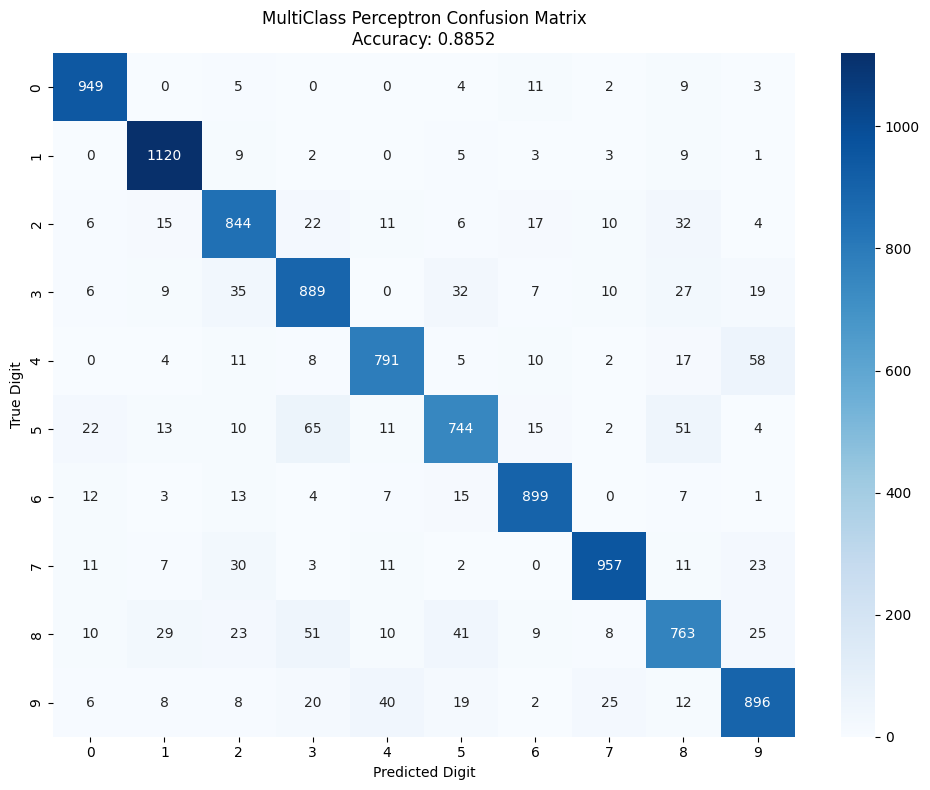

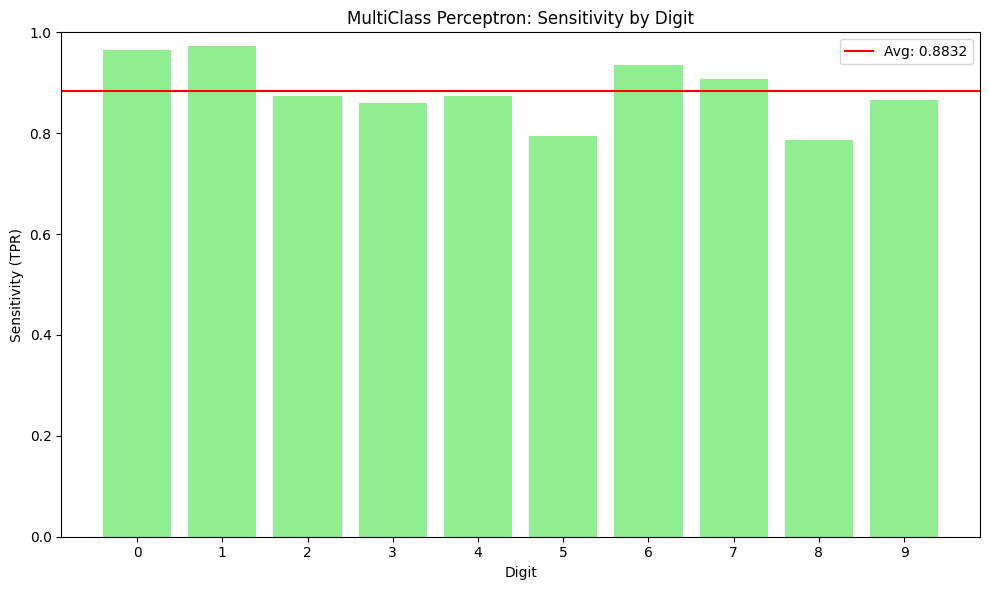

In [20]:
def train_and_evaluate_multiclass_perceptron(X_train, y_signed_train, X_test, y_test_onehot, max_iterations=700):
    print("=== Training MultiClass Perceptron ===")

    # Create and train the MultiClassPerceptron
    model = MultiClassPerceptron(n_features=X_train.shape[1], n_classes=10, max_iterations=max_iterations)
    model.fit(X_train, y_signed_train)

    # Make predictions on test data
    y_pred = model.predict(X_test)
    y_true = np.argmax(y_test_onehot, axis=1)

    # Calculate overall accuracy
    accuracy = np.mean(y_pred == y_true)
    print(f"\nMultiClass Perceptron Accuracy: {accuracy:.4f}")

    # Generate confusion matrix
    conf_matrix = np.zeros((10, 10), dtype=int)
    for i in range(len(y_true)):
        conf_matrix[y_true[i], y_pred[i]] += 1

    # Calculate sensitivity for each digit
    sensitivities = np.zeros(10)
    for i in range(10):
        sensitivities[i] = conf_matrix[i, i] / np.sum(conf_matrix[i, :]) if np.sum(conf_matrix[i, :]) > 0 else 0

    # Print sensitivity for each digit
    print("\nSensitivity (TPR) for each digit:")
    for digit in range(10):
        print(f"Digit {digit}: {sensitivities[digit]:.4f}")

    print(f"\nAverage Sensitivity: {np.mean(sensitivities):.4f}")

    # Plot confusion matrix as heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
               xticklabels=range(10), yticklabels=range(10))
    plt.xlabel('Predicted Digit')
    plt.ylabel('True Digit')
    plt.title(f'MultiClass Perceptron Confusion Matrix\nAccuracy: {accuracy:.4f}')
    plt.tight_layout()
    plt.show()

    # Plot sensitivities as bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(range(10), sensitivities, color='lightgreen')
    plt.axhline(y=np.mean(sensitivities), color='r', linestyle='-', label=f'Avg: {np.mean(sensitivities):.4f}')
    plt.ylim(0, 1)
    plt.xlabel('Digit')
    plt.ylabel('Sensitivity (TPR)')
    plt.title('MultiClass Perceptron: Sensitivity by Digit')
    plt.xticks(range(10))
    plt.legend()
    plt.tight_layout()
    plt.show()

    return model, accuracy, sensitivities, conf_matrix

# Train and evaluate multiclass perceptron
model, accuracy, sensitivities, conf_matrix = train_and_evaluate_multiclass_perceptron(
    X_train, y_signed_train, X_test, y_test_onehot)